# Data Importing and Pre-processing

### Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used

In [1]:
# Import dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler

e_df = pd.read_csv('online_shoppers_intention.csv')
e_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


In [2]:
# Describe the dataset
print(f"Dataset Dimensions: {e_df.shape}")
print(f"\nData Types:\n{e_df.dtypes}")
print(f"\nDataset Information:\n{e_df.info()}")
print(f"\nDataset Summary:\n{e_df.describe()}")

Dataset Dimensions: (12330, 18)

Data Types:
Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-

### Clean, wrangle, and handle missing data

In [3]:
# Check for missing values
print(f"Missing Values:\n{e_df.isnull().sum()}")

# --------Handle Missing Values--------

# Fill numeric columns with the median
e_df['BounceRates'].fillna(e_df['BounceRates'].median())
e_df['ExitRates'].fillna(e_df['ExitRates'].median())

# Replace page duration columns with 0
e_df['Administrative_Duration'].fillna(0)
e_df['Informational_Duration'].fillna(0)
e_df['ProductRelated_Duration'].fillna(0)

# Fill categorical values with mode 
e_df['Month'].fillna(e_df['Month'].mode()[0])
e_df['VisitorType'].fillna(e_df['VisitorType'].mode()[0])

# Drop any remaining rows that have missing values 
e_df.dropna()

Missing Values:
Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0.0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4.0,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0.0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3.0,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0.0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3.0,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0.0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2.0,2,3,11,Returning_Visitor,False,False


### Transform data appropriately using techniques such as aggregation, normalization, and feature construction

In [4]:
# Normalize numerical features to ensure consistent scales
scaler = MinMaxScaler()
e_df[['BounceRates', 'ExitRates', 'ProductRelated_Duration']] = scaler.fit_transform(
    e_df[['BounceRates', 'ExitRates', 'ProductRelated_Duration']]
)

# Aggregate the average product-related duration by Region and reset the index
region_product_duration = e_df.groupby('Region')['ProductRelated_Duration'].mean().reset_index()
region_product_duration.rename(columns={'ProductRelated_Duration': 'Avg_Product_Duration'}, inplace=True)

# Drop any duplicate 'Avg_Product_Duration' columns
if 'Avg_Product_Duration' in e_df.columns:
    e_df = e_df.drop(columns=['Avg_Product_Duration'])

# Now merge with the main dataframe
e_df = e_df.merge(region_product_duration, on='Region', how='left')

# Feature Construction: Create a "Total Duration" feature for overall session length
e_df['TotalDuration'] = e_df['Administrative_Duration'] + e_df['Informational_Duration'] + e_df['ProductRelated_Duration']

### Reduce redundant data and perform need based discretization

In [5]:
# Drop redundant columns
e_df.drop(columns=['Administrative_Duration', 'Informational_Duration'], inplace=True)

# Discretize 'TotalDuration' into categories
e_df['DurationCategory'] = pd.cut(e_df['TotalDuration'], bins=3, labels=["Low", "Medium", "High"])

# Final review of the cleaned and preprocessed data
print(f"\nFinal DataFrame Summary:\n{e_df.info()}")
print(f"\nSample Data:\n{e_df.head()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Informational            12202 non-null  float64 
 2   ProductRelated           12330 non-null  int64   
 3   ProductRelated_Duration  12330 non-null  float64 
 4   BounceRates              12330 non-null  float64 
 5   ExitRates                12330 non-null  float64 
 6   PageValues               12195 non-null  float64 
 7   SpecialDay               12330 non-null  float64 
 8   Month                    12330 non-null  object  
 9   OperatingSystems         12207 non-null  float64 
 10  Browser                  12330 non-null  int64   
 11  Region                   12330 non-null  int64   
 12  TrafficType              12330 non-null  int64   
 13  VisitorType              12330 non-null  object  
 14  Weeken

# Data Analysis and Visualization

### Identify categorical, ordinal, and numerical variables within the data

<p><strong>CATEGORICAL VARIABLES:</strong>
Administrative, Informational, ProductRelated, Month, Weekend, Revenue,
DurationCategory, Operating Systems, Browser,Region, TrafficType, VisitorType, Weekendd, Revenue, and DurationCategory

From the categorical variables stated above, the following are ORDINAL VARIABLES: 

<strong>NUMERICAL VARIABLES:</strong>
ProductRelated_Duration, BounceRates, ExitRates, PageValues, 
SpecialDay, Avg_Product_Duration, and TotalDuration</p>

### Provide measures of centrality and distribution with visualizations

In [6]:
numerical_variables = ['ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 
'SpecialDay', 'Avg_Product_Duration', 'TotalDuration']
# Filter numerical 
numerical_df = e_df[ numerical_variables]

In [7]:
# Descriptive Statistics for Numerical Variables
numerical_df.describe()

,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Avg_Product_Duration,TotalDuration
count,12330.000000,12330.000000,12330.000000,12195.000000,12330.000000,12330.000000,12330.000000
mean,0.018676,0.110957,0.215364,5.911196,0.061427,0.018676,115.309684
std,0.029913,0.242442,0.242983,18.632116,0.198917,0.001178,250.824728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.016182,0.000000
25%,0.002878,0.000000,0.071429,0.000000,0.000000,0.017859,0.005438
50%,0.009362,0.015562,0.125782,0.000000,0.000000,0.018577,18.578519
75%,0.022887,0.084063,0.250000,0.000000,0.000000,0.019947,120.977855
max,1.000000,1.000000,1.000000,361.763742,1.000000,0.019947,5949.125000


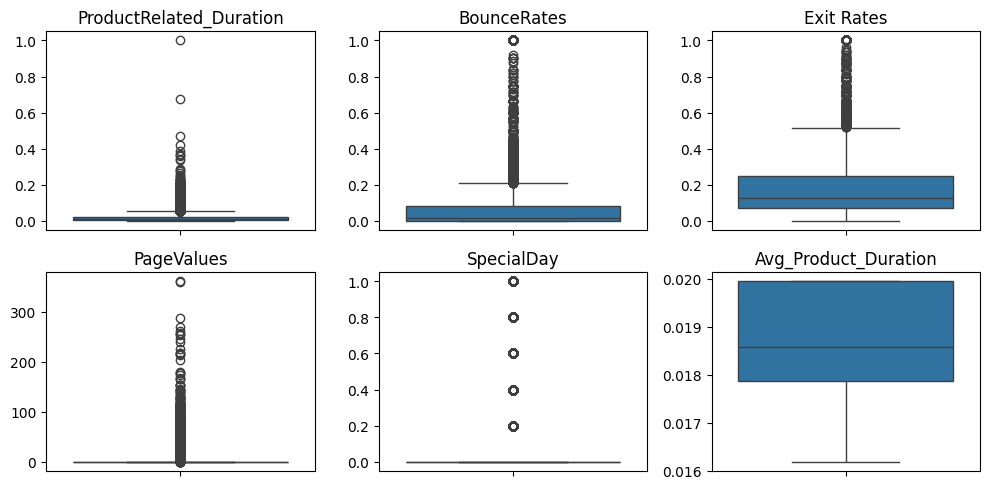

In [8]:
# Create subplots
# Axes 2*3 matrix axes
# Winsorize 10% from both the lower and upper tails
# numerical_df = winsorize(numerical_df, limits=[0.1, 0.1])
# Winsorize 10% from both the lower and upper tails
def winsorize_dataframe(df, limits=(0.2, 0.2)):
    """Winsorizes all numeric columns in the dataframe."""
    df_winsorized = df.copy()
    for col in df_winsorized.select_dtypes(include='number'):
        df_winsorized[col] = winsorize(df_winsorized[col], limits=limits)
    return df_winsorized

# numerical_df = winsorize_dataframe(numerical_df)

fig, axes = plt.subplots(2, 3, figsize=(10, 5))

# Boxplot for ProductRelated_Duration
sns.boxplot(y=numerical_df['ProductRelated_Duration'], ax=axes[0,0])
axes[0,0].set_title('ProductRelated_Duration')

# Boxplot for BounceRates
sns.boxplot(y=numerical_df['BounceRates'],  ax=axes[0,1])
axes[0,1].set_title('BounceRates')

# Boxplot for ExitRates
sns.boxplot(y=numerical_df['ExitRates'], ax=axes[0,2] )
axes[0,2].set_title('Exit Rates')

# Boxplot for PageValues
sns.boxplot(y=numerical_df['PageValues'], ax=axes[1,0])
axes[1,0].set_title('PageValues')

# Boxplot for SpecialDay
sns.boxplot(y=numerical_df['SpecialDay'],  ax=axes[1,1])
axes[1,1].set_title('SpecialDay')

# Boxplot for Avg_Product_Duration
sns.boxplot(y=numerical_df['Avg_Product_Duration'], ax=axes[1,2] )
axes[1,2].set_title('Avg_Product_Duration')

# Removes y-labels from all plots
for row in axes:
    for element in row:
        element.set_ylabel("")
        
plt.tight_layout()
plt.show()

### Diagnose for correlations between variables and determine independent and dependent variables

<p>Based on the correlation matrix show above. The only two variables that are strongly correlated are: BounceRates and ExitRates, with a positive correlation coeeficient of .91. The remaining numerical variables have weak correlation ranging from .01 to .4.</p> 

In [9]:
numerical_df.corr()

,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Avg_Product_Duration,TotalDuration
ProductRelated_Duration,1.000000,-0.184541,-0.251984,0.052925,-0.036380,0.039372,0.445539
BounceRates,-0.184541,1.000000,0.913004,-0.119170,0.072702,-0.002328,-0.143194
ExitRates,-0.251984,0.913004,1.000000,-0.174586,0.102242,0.001189,-0.204150
PageValues,0.052925,-0.119170,-0.174586,1.000000,-0.065601,0.002839,0.064660
SpecialDay,-0.036380,0.072702,0.102242,-0.065601,1.000000,0.010189,-0.068826
Avg_Product_Duration,0.039372,-0.002328,0.001189,0.002839,0.010189,1.000000,0.013477
TotalDuration,0.445539,-0.143194,-0.204150,0.064660,-0.068826,0.013477,1.000000


#### Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

Hi guys, it's me!